# Auto Arima

- **pmdarima** (python pkg) allows for an automatic calculation of an ARIMA model using statsmodels within.

## To use **pmdarima**
```python
# Assuming data is in a time Series format

model = pm.auto_arima(data, ..., seasonal=True, m=12)

# return predictions and confidence intervals
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

# in-sample (train) predictions
train_pred = model.predict_in_sample(start=0, end=-1)
```

## Seasonal ARIMA (SARIMA)
- Notation: SARIMA{(p, d, q) x (P, D, Q)<sub>m</sub>}
    - m = seasonal period
- If you write the SARIMA model in "operator"-form, it is the multiplication of the non-seasonal and seasonal parts.

## ARIMA without Seasonality
- ARIMA can still model seasonal time series, just not as nicely
- FACT: AR(2) can perfectly model a sine wave (without specifying seasonality)

# SARIMAX
- "X" refers to exogenous variables
- Suppose you have a time series of length T 
- You collect external data, e.g. sentiment analysis of Elon Musk's tweets
- You'll have an array of feature vecors `(T x D)`
- This can be passed into Auto ARIMA
- NOTE: In order to make predictions, you'll need feature vecotrs for that time period 

# Model Selection, AIC and BIC

*How do we difine the best model?*

- Auto ARIMA finds the best model, but what is "best"?
- Auto ARIMA can do grid search to find the best model, but default is **stepwise** search
    - Exhaustive grid search is still slow

## Model Evaluation
- **AIC** (Akaike Information Criterion), **BIC** (Bayesian Information Criterion)
- Trade-off between model **complexity** and model **accuracy**
- For ARIMA, more complexity = larger p + q
- The **loss function** for ARIMA is the negative log-likelihood
- (For the most part) minimizing the log-likelihood is the same as minimizing the squared error (see previous notebooks)
- We choose the model that yields the *minimum* evaluation metric.
    - `Evaluation Metric = Negative_Log_Likelihood + Penalty`

## AIC and BIC
- Almost the same process of evaluation.
- Difference is in the penalty term
- Auto ARIMA uses AIC by default (but usually both give the same answer anyway)



---
<br/>

# ARIMA (in code) pt. 2 - Using Auto-ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../airline_passengers.csv", index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df['LogPassengers'] = np.log(df['Passengers'])

In [4]:
# Seperate data and have last 12 points be the test set

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
import pmdarima as pm

In [6]:
# Call the AutoArima function on the training data to find the best ARIMA model.

model = pm.auto_arima(train['Passengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=3.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.41 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.38 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.49 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.40 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
# Get the summary from above ARIMA tests

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 16 Mar 2021   AIC                            905.686
Time:                                    12:01:03   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# Call predict on the model

test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

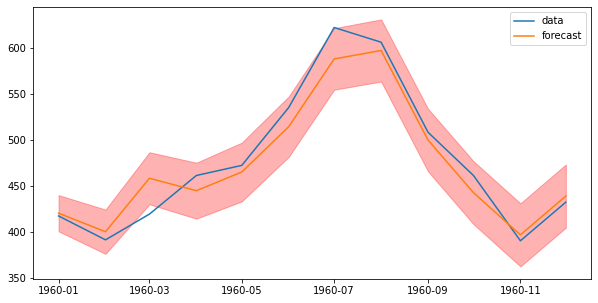

In [9]:
# Plot forecast and true values

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

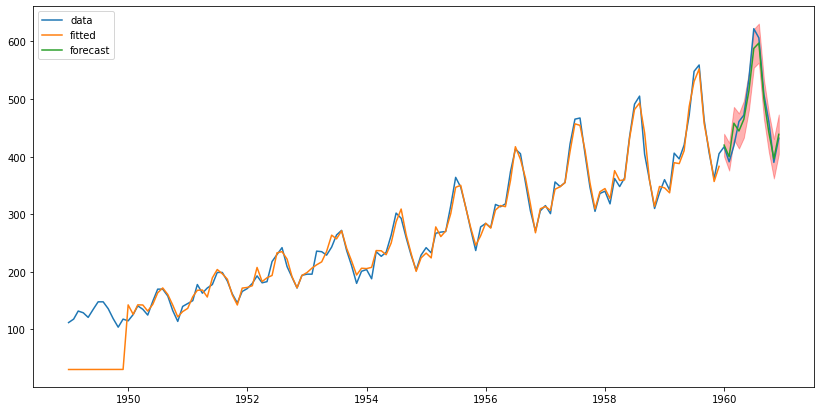

In [10]:
# Plot the full dataset including the forecast

train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [11]:
# Testing the AutoARIMA on LogPassengers

logmodel = pm.auto_arima(train['LogPassengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.800, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.73 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=1.49 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.72 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=5.71 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.717, Time=1.69 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=6.87 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.402, Time=1.36 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.41 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.005, Time=1.66 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=4.64 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [ ]:
logmodel.summary()

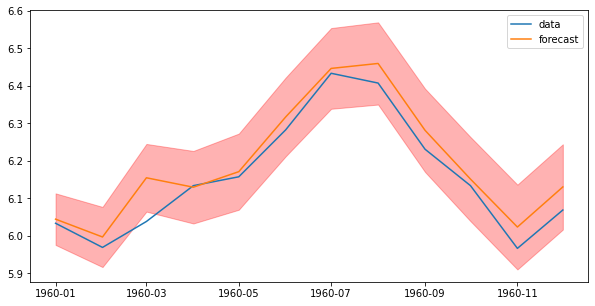

In [13]:
# Predict and Plot forecast with true values

test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

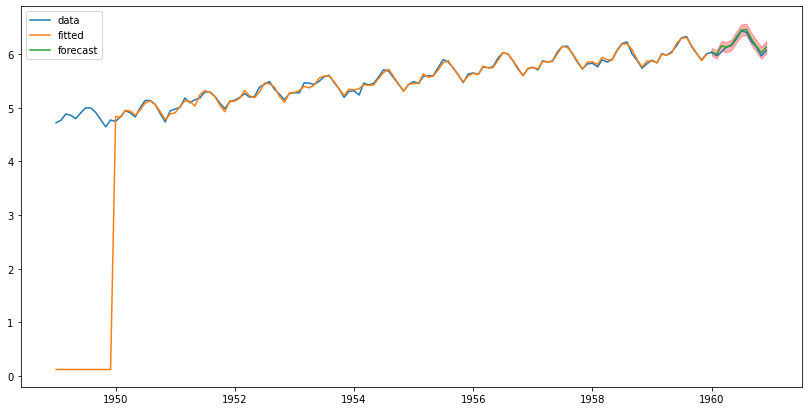

In [17]:
# Plot the full LOG dataset including the forecast

train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [18]:
# Using the RMSE to see if the above models are as good a prediction as it appears

def rmse(t, y):
    return np.sqrt(np.mean((t - y) **2))

In [22]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468860804916
Logged RMSE: 23.04152494073324


Looks like the non-logged values gave the better result

---
<br/>

# ARIMA (in code) pt. 2

In [12]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../sp500sub.csv", index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


<AxesSubplot:xlabel='Date'>

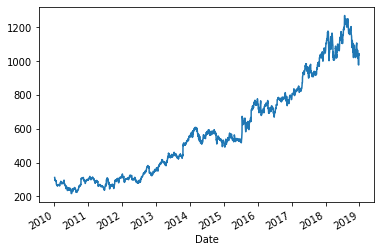

In [48]:
# Working with non-log prices for this exercise

goog = df[df['Name'] == 'GOOG']['Close']
goog.plot()

In [49]:
# Split data with 30 day test variable

Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [50]:
# Use AutoARIMA to build model - Seasonal is False, otherwise pass in the seasonal period as well.

model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.18 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 4.866 seconds


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Tue, 16 Mar 2021   AIC                          16264.983
Time:                        12:24:37   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# A more concise way to get the summary 

model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [97]:
# Creating a function to plot the data like in previous examples. ie: full data with split train/test data

def plot_result(model, fulldata, train, test, Ntest=30):
    """Plots the entire fulldata set, the training data, and test/forecasted data on a single plot respectively"""
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(fulldata.index, fulldata, label='Data')
    ax.plot(train.index[d:], train_pred, label='Fitted')
    ax.plot(test.index, test_pred, label='Forecast')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
    ax.legend()

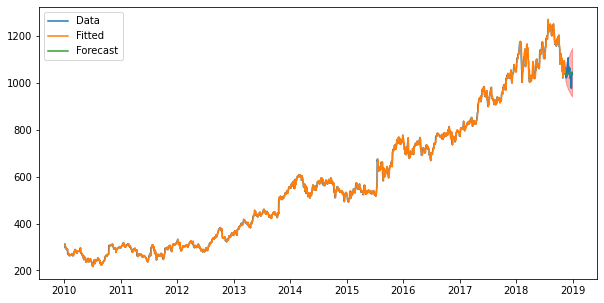

In [54]:
plot_result(model, goog, train, test)

In [98]:
def plot_test(model, test, Ntest=30):
    """Plots the test/fitted_data period for better evaluation"""
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(test.index, test, label='True')
    ax.plot(test.index, test_pred, label='Forecast')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='red', alpha=0.3)
    ax.legend()

Text(0.5, 1.0, "Test results from ARIMA model - GOOG\nNote, the Forecast isn't very good, however, the true price staying in the limits is impressive.")

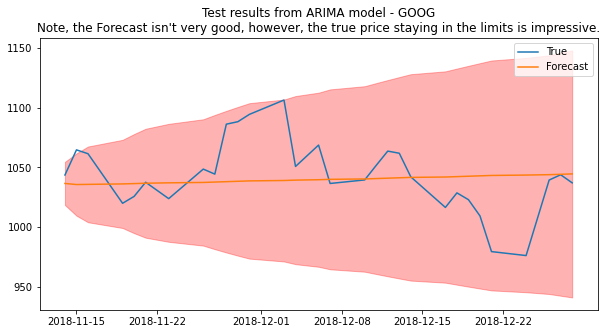

In [56]:
plot_test(model, test)
plt.title("Test results from ARIMA model - GOOG\nNote, the Forecast isn't very good, however, the true price staying in the limits is impressive.")

In [57]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y) **2))

In [58]:
# Testing to see if this ARIMA model does any better than a Naive forecast

print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.436602011716605
RMSE Naive: 30.029502477261467


Text(0.5, 1.0, 'AAPL\nNote, the large drop at the end of the data. ARIMA will have trouble breaking away from the trend')

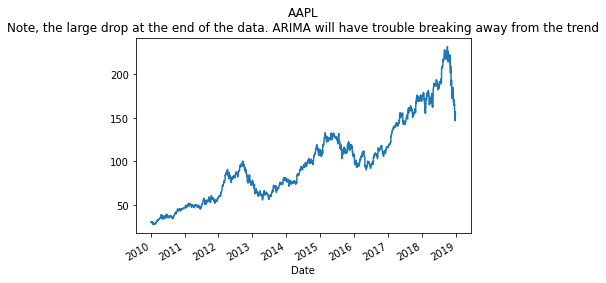

In [62]:
# Performing the same ARIMA process to AAPL

aapl = df[df['Name'] == 'AAPL']['Close']
aapl.plot()
plt.title("AAPL\nNote, the large drop at the end of the data. ARIMA will have trouble breaking away from the trend")

In [61]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.31 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4279.148
Date:                Tue, 16 Mar 2021   AIC                           8570.296
Time:                        12:28:36   BIC                           8604.560
Sample:                             0   HQIC                          8582.808
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0803      0.042      1.896      0.058      -0.003       0.163
ar.L1          0.3755      0.165      2.279      0.023       0.053       0.699
ar.L2         -0.4239      0.176     -2.407      0.016      -0.769      -0.079
ma.L1         -0.3433      0.172     -2.002      0.045      -0.679      -0.007
ma.L2          0.3579      0.183      1.958      0.050      -0.000       0.716
sigma2         2.7182      0.039     69.453      0.000       2.642       2.795
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.04
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'AAPL - AutoARIMA Model')

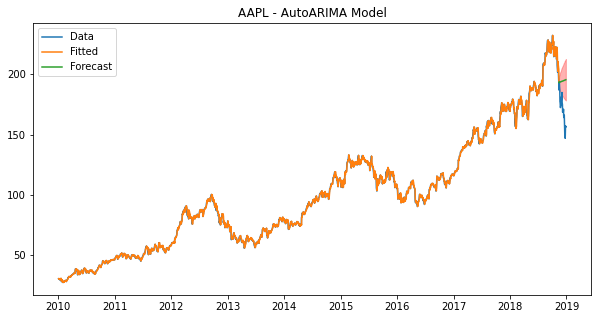

In [65]:
plot_result(model, aapl, train, test)
plt.title("AAPL - AutoARIMA Model")

Text(0.5, 1.0, 'AAPL - ARIMA Forecast\nNote, the short-term prediction IS accurate')

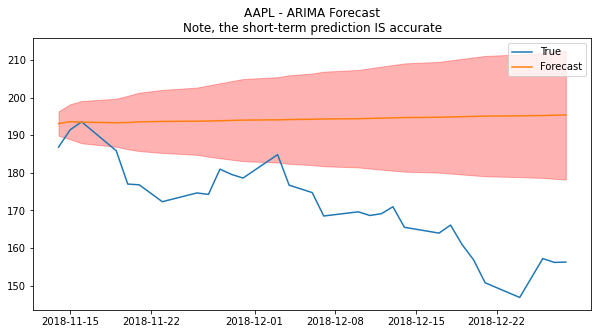

In [68]:
plot_test(model, test)
plt.title("AAPL - ARIMA Forecast\nNote, the short-term prediction IS accurate")

In [69]:
# Evaluating ARIMA against Naive

print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 26.0949678545037
RMSE Naive: 24.02712058667382


Text(0.5, 1.0, 'IBM')

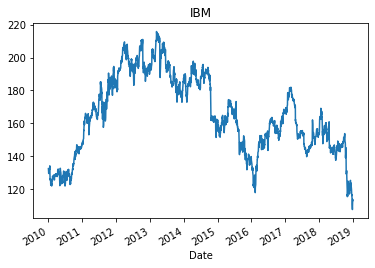

In [71]:
# Testing IBM ARIMA vs Naive

ibm = df[df['Name'] == 'IBM']['Close']
ibm.plot()
plt.title("IBM")

In [72]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)
model.summary()

# With (p, d, q)=(0, 1, 0) ARIMA suggest a random walk is the best fitting model.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.502 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4716.049
Date:                Tue, 16 Mar 2021   AIC                           9434.097
Time:                        12:34:49   BIC                           9439.808
Sample:                             0   HQIC                          9436.183
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.0067      0.055     72.559      0.000       3.898       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              5352.76
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'IBM - ARIMA Model Results')

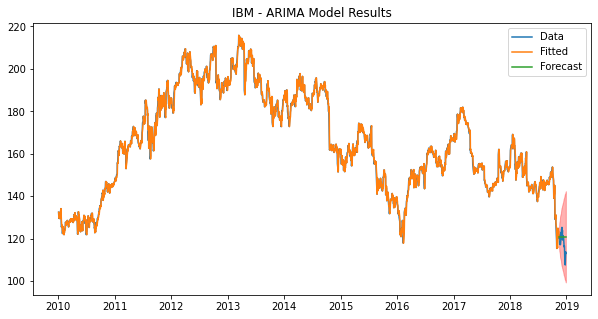

In [75]:
plot_result(model, ibm, train, test)
plt.title("IBM - ARIMA Model Results")

Text(0.5, 1.0, 'IBM - ARIMA Forecast Results')

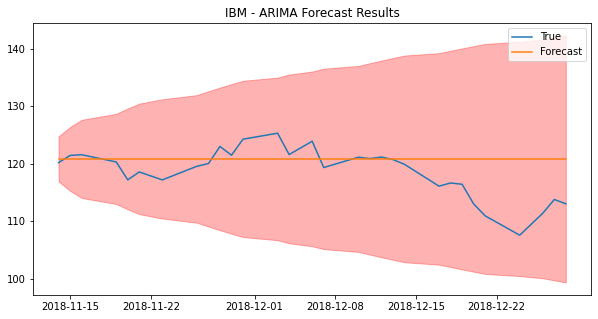

In [76]:
plot_test(model, test)
plt.title("IBM - ARIMA Forecast Results")

In [77]:
# Evaluating ARIMA against Naive - ARIMA used the Naive Forecast as the prediction!

print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 4.763157130051095
RMSE Naive: 4.763157130051095


<AxesSubplot:xlabel='Date'>

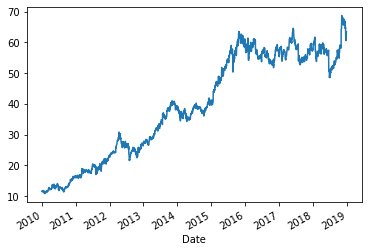

In [78]:
# SBUX

sbux = df[df['Name'] == 'SBUX']['Close']
sbux.plot()

In [79]:
train = sbux[:-Ntest]
test = sbux[-Ntest:]

model = pm.auto_arima(train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=10, seasonal=False)
model.summary()

# Another RandomWalk (like IBM) BUT with a drift (intercept)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.550 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1923.948
Date:                Tue, 16 Mar 2021   AIC                           3851.895
Time:                        12:41:46   BIC                           3863.317
Sample:                             0   HQIC                          3856.066
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.012      2.048      0.041       0.001       0.049
sigma2         0.3283      0.003     94.371      0.000       0.321       0.335
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             18901.16
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               3.80   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'SBUX - ARIMA Model Result')

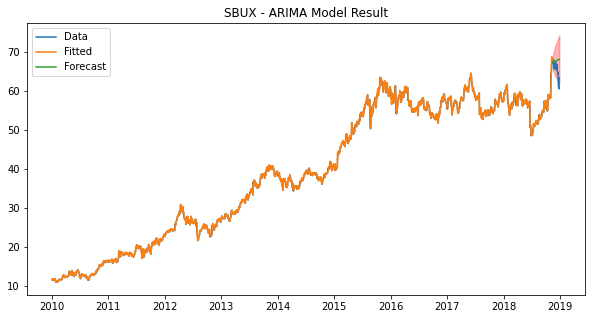

In [81]:
plot_result(model, sbux, train, test)
plt.title("SBUX - ARIMA Model Result")

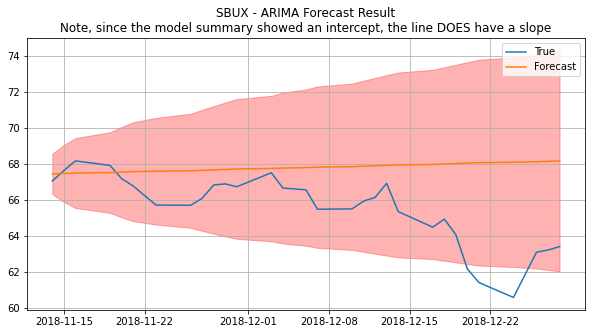

In [91]:
plot_test(model, test)
plt.title("SBUX - ARIMA Forecast Result\nNote, since the model summary showed an intercept, the line DOES have a slope")
plt.grid()

In [93]:
# Evaluating ARIMA against Naive - Assuming a RandomWalk with 0 drift would have been better (like IBM)

print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 3.094903477837591
RMSE Naive: 2.6889385763409135
